In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

import tempfile

os.chdir("/content/drive/My Drive/Colab Notebooks")

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Training Folder Volcanos',
                                          target_size = (250,250),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/VALIDATION VOLCANO',
                                          target_size = (250,250),
                                          batch_size = 3,
                                          class_mode = 'binary')
test_dataset = test.flow_from_directory('/content/drive/MyDrive/TESTING VOLCANO DATA',
                                          target_size = (250,250),
                                          batch_size = 3,
                                          class_mode = 'binary')


Found 70 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_dataset.class_indices

{'volcanos erupting in 1-2 weeks': 0, 'volcanos erupting within 3-6 months': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:

model = tf.keras.Sequential([


  keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

   keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),





  keras.layers.Flatten(),

  keras.layers.Dense(128 ,activation = 'relu'),
  keras.layers.Dense(256 ,activation = 'relu'),
  keras.layers.Dense(512 ,activation = 'relu'),
  keras.layers.Dense(1024 ,activation = 'relu'),

  keras.layers.Dense(1, activation = 'sigmoid'),
])


In [ ]:
model_train=model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_fit= model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 20,
                     validation_data = train_dataset)

Epoch 1/20
5/5 [==============================] - 3s 673ms/step - loss: 0.5912 - accuracy: 0.5333 - val_loss: 0.7663 - val_accuracy: 0.6286
Epoch 2/20
5/5 [==============================] - 3s 649ms/step - loss: 2.9780 - accuracy: 0.6000 - val_loss: 0.6738 - val_accuracy: 0.6000
Epoch 3/20
5/5 [==============================] - 3s 654ms/step - loss: 0.6503 - accuracy: 0.6667 - val_loss: 0.6515 - val_accuracy: 0.7429
Epoch 4/20
5/5 [==============================] - 3s 665ms/step - loss: 0.6956 - accuracy: 0.4667 - val_loss: 0.6354 - val_accuracy: 0.7857
Epoch 5/20
5/5 [==============================] - 3s 619ms/step - loss: 0.6592 - accuracy: 0.6154 - val_loss: 0.5433 - val_accuracy: 0.7286
Epoch 6/20
5/5 [==============================] - 3s 656ms/step - loss: 0.4622 - accuracy: 0.7333 - val_loss: 0.4772 - val_accuracy: 0.7857
Epoch 7/20
5/5 [==============================] - 3s 658ms/step - loss: 0.4883 - accuracy: 0.7333 - val_loss: 0.4005 - val_accuracy: 0.8857
Epoch 8/20
5/5 [====

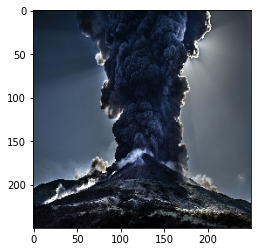

VOLCANO ERUPTING IN 1-2 WEEKS


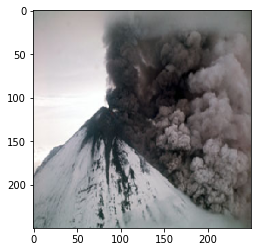

VOLCANO ERUPTING IN 1-2 WEEKS


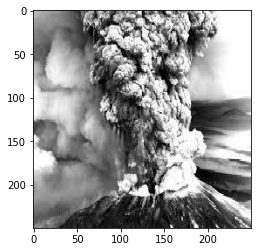

VOLCANO ERUPTING IN 1-2 WEEKS


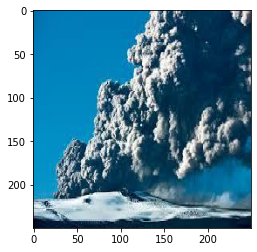

VOLCANO ERUPTING IN 1-2 WEEKS


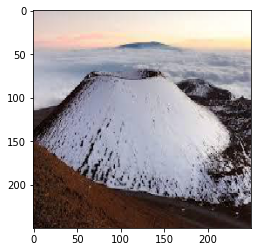

VOLCANO ERUPTING IN 3-6 MONTHS


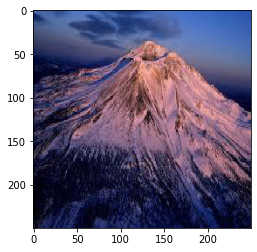

VOLCANO ERUPTING IN 3-6 MONTHS


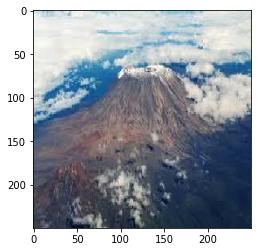

VOLCANO ERUPTING IN 3-6 MONTHS


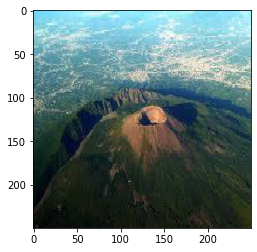

VOLCANO ERUPTING IN 3-6 MONTHS


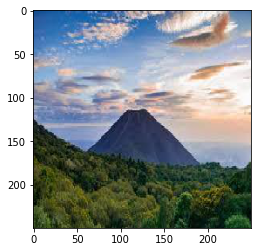

VOLCANO ERUPTING IN 3-6 MONTHS


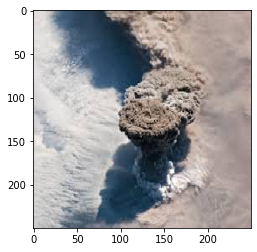

VOLCANO ERUPTING IN 1-2 WEEKS


In [ ]:
dir_path = '/content/drive/MyDrive/VALIDATION VOLCANO'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' +i, target_size = (250,250))

  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  val = model.predict(images)

  if val == 0:
    print("VOLCANO ERUPTING IN 1-2 WEEKS")
  else:
    print("VOLCANO ERUPTING IN 3-6 MONTHS")

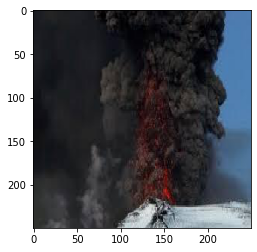

VOLCANO ERUPTING IN 1-2 WEEKS


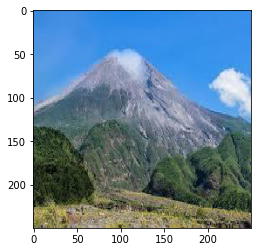

VOLCANO ERUPTING IN 3-6 MONTHS


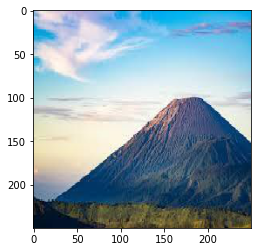

VOLCANO ERUPTING IN 1-2 WEEKS


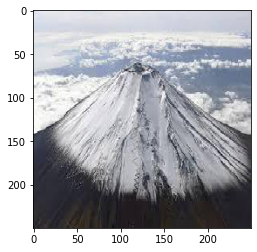

VOLCANO ERUPTING IN 1-2 WEEKS


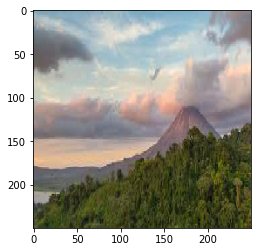

VOLCANO ERUPTING IN 3-6 MONTHS


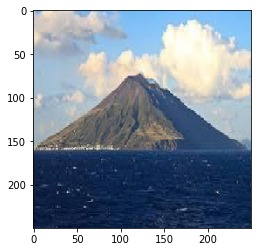

VOLCANO ERUPTING IN 3-6 MONTHS


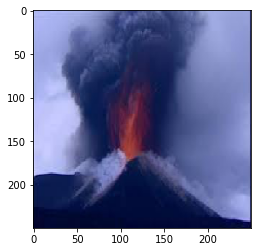

VOLCANO ERUPTING IN 1-2 WEEKS


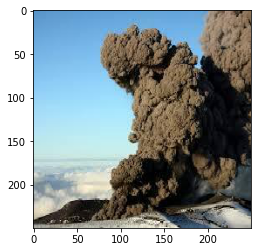

VOLCANO ERUPTING IN 1-2 WEEKS


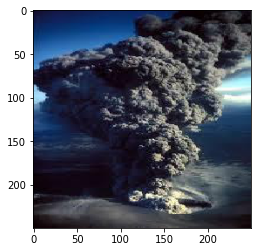

VOLCANO ERUPTING IN 1-2 WEEKS


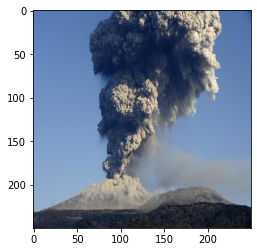

VOLCANO ERUPTING IN 1-2 WEEKS


In [ ]:
dir_path = '/content/drive/MyDrive/TESTING VOLCANO DATA'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' +i, target_size = (250,250))

  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  val = model.predict(images)

  if val == 0:
    print("VOLCANO ERUPTING IN 1-2 WEEKS")
  else:
    print("VOLCANO ERUPTING IN 3-6 MONTHS")